In [23]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 12

In [71]:
with open("Data_10-11_Deltat_Aluminium.txt", "r", encoding="utf-8") as f:
    data1 = f.readlines()
Data1= np.array([float(line.split(",")[0]) for line in data1])

with open("Data_14-11_Deltat_Aluminium.txt", "r", encoding="utf-8") as f:
    data2 = f.readlines()
Data2 = np.array([float(line.split(",")[0]) for line in data2])

data = np.concatenate((Data1, Data2), axis = 0)
print(len(data))


37


In [80]:
B = 6
y, binedge = np.histogram(data, bins = B)
centers = 0.5*(binedge[1:] + binedge[:-1])
error = np.sqrt(y)

def f(t, N, tau):
    return N*np.exp(-t/tau)

popt, pcov = curve_fit(f, centers, y, sigma = error)
xfit = np.linspace(0, np.max(centers)+1, 100)
fit = f(xfit, *popt)


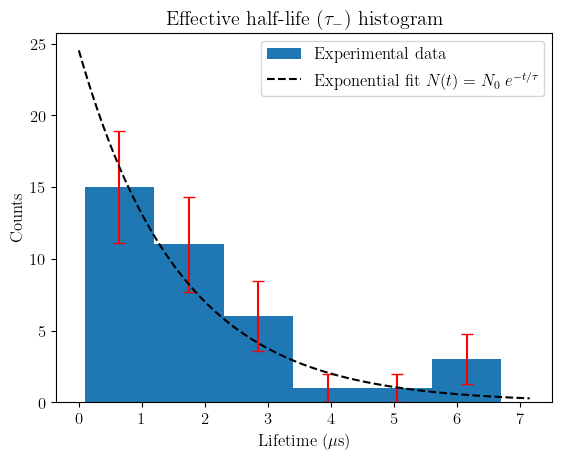

In [88]:

fig, ax = plt.subplots()

ax.hist(data, bins = B, label = 'Experimental data')
ax.errorbar(centers, y, error, fmt = " ", capsize = 4, color = 'r')
ax.plot(xfit, fit,'k--', label = r'Exponential fit $N(t)=N_0 \; e^{-t/\tau}$')
ax.set_xlabel(r"Lifetime ($\mu$s)")
ax.set_ylabel("Counts")
ax.set_title(r'Effective half-life ($\tau_{-}$) histogram')
ax.legend()